In [1]:
import pandas as pd
import numpy as np

# Data preparation

In [2]:
df_raw = pd.read_csv('./Data_Processed_All_Contractors_Characteristics - Data2.csv')

In [3]:
list(df_raw.columns).index('applied 2019')

59

# (1) Extract X and Y for model1: apply~register

In [4]:
df_RtoA_xy_raw=df_raw.iloc[:,:60].drop(['Dealer ID','JS 17.Column3','JS 18.Column3','JS 19.Column3',\
                                                         'NON USER 17.Column3','NON USER 18.Column3','Velocity 17.Column3','centurty 18.Column3',\
                                                         'Gibson 18.Column3','No. of Employees'],axis=1)
df_RtoA_xy_raw.columns

Index(['year', 'train_test', 'Converted State-AL', 'Converted State-AR',
       'Converted State-CA', 'Converted State-FL', 'Converted State-GA',
       'Converted State-IL', 'Converted State-IN', 'Converted State-KY',
       'Converted State-LA', 'Converted State-MI', 'Converted State-MO',
       'Converted State-NC', 'Converted State-NJ', 'Converted State-OH',
       'Converted State-Others', 'Converted State-PA', 'Converted State-SC',
       'Converted State-TN', 'Converted State-TX', 'employeebucket-NA',
       'employeebucket-4~8', 'employeebucket-<4', 'employeebucket->8',
       'Sales between 0-99,999', 'Sales between 100,000-499,999',
       'Other Sales', 'Sales N/A', 'Currently offers Consumer Financing?_No',
       'Currently offers Consumer Financing?_Yes',
       'Currently offers Consumer Financing?_N/A', 'Over 10', 'Below 10',
       'No year info', 'Hitting Potential 16.Column3', 'JS 16.Column3',
       'NON USER 16.Column3', 'brand_1', 'brand_2', 'brand_3', 'brand_4',


# (2) Drop NaN rows

In [5]:
print(df_RtoA_xy_raw.isnull().any())

year                                        False
train_test                                  False
Converted State-AL                          False
Converted State-AR                          False
Converted State-CA                          False
Converted State-FL                          False
Converted State-GA                          False
Converted State-IL                          False
Converted State-IN                          False
Converted State-KY                          False
Converted State-LA                          False
Converted State-MI                          False
Converted State-MO                          False
Converted State-NC                          False
Converted State-NJ                          False
Converted State-OH                          False
Converted State-Others                      False
Converted State-PA                          False
Converted State-SC                          False
Converted State-TN                          False


In [6]:
# narow=[]
# for i in range(df_RtoA_xy_raw.shape[0]):
#     if df_RtoA_xy_raw["No. of Employees"].isnull()[i]== True:
#         narow.append(i)

# df_RtoA_xy=df_RtoA_xy_raw.drop(narow,axis=0)
# df_RtoA_xy["No. of Employees"].isnull().any()

# (3) Extract 2017 registered

In [10]:
df_RtoA_xy_2017reg = df_RtoA_xy_raw.loc[df_raw['year'] == 2017,:].drop(['year','applied 2016','applied 2018','applied 2019'],axis=1)
df_RtoA_xy_2017reg.head()

,train_test,Converted State-AL,Converted State-AR,Converted State-CA,Converted State-FL,Converted State-GA,Converted State-IL,Converted State-IN,Converted State-KY,Converted State-LA,...,NON USER 16.Column3,brand_1,brand_2,brand_3,brand_4,brand_5,brand_6,brand_7,brand_8,applied 2017
1473,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1474,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1475,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
1476,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1477,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


# Devide into train and test data

In [11]:
df_RtoA_xy_2017reg.train_test.value_counts()

1    986
0    247
Name: train_test, dtype: int64

In [12]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)

X_train=df_RtoA_xy_2017reg.loc[df_RtoA_xy_2017reg['train_test']==1,:'brand_8'].drop(['train_test'],axis=1)
X_test=df_RtoA_xy_2017reg.loc[df_RtoA_xy_2017reg['train_test']==0,:'brand_8'].drop(['train_test'],axis=1)
Y_train=df_RtoA_xy_2017reg.loc[df_RtoA_xy_2017reg['train_test']==1,'applied 2017']
Y_test=df_RtoA_xy_2017reg.loc[df_RtoA_xy_2017reg['train_test']==0,'applied 2017']

# Build logistic regression model (with cv)

In [13]:
import numpy as np
from sklearn.linear_model.logistic import LogisticRegressionCV #model building
from sklearn.preprocessing import StandardScaler #standardize xs
#from sklearn.model_selection import GridSearchCV #GridSearchCV: cross validation

In [11]:
# sc = StandardScaler()
# sc.fit(X_train)
# X_train = sc.transform(X_train)
# X_test = sc.transform(X_test)

In [14]:
logreg = LogisticRegressionCV(solver='liblinear')
logreg.fit(X_train, Y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)

# Model Evaluation

     1. Confusion Matrix
     2 TP, FP, TN, FN
     3. Accuracy Rate
     4. PPV & NPV
     5. Sensitivity & Specificity
     6. F1 Score
     **********Summary***********
     7. Cumulative Gains Chart
     8. AUC-ROC Curve

# (1) Confusion Matrix

In [15]:
pred = logreg.predict(X_test)
pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1])

In [16]:
from sklearn.metrics import confusion_matrix 
matrix = confusion_matrix(Y_test, pred, labels=None, sample_weight=None)
tn, fp, fn, tp=matrix.ravel() #与下面计算tn, fp, fn, tp重复
df_confusion_matrix = pd.DataFrame([[tp,fp],[tn,fn]],columns=['pred_positive','pred_negative'],index=['real_positive','real_negative'])
df_confusion_matrix

,pred_positive,pred_negative
real_positive,79,52
real_negative,74,42


# (2) TP, FP, TN, FN


Positive, Negative: 预测结果

True, False: 预测是否正确

-> Method 1: 从confusion matrix获得（见上）

In [17]:
tn, fp, fn, tp=matrix.ravel()
(tn, fp, fn, tp)

(74, 52, 42, 79)

-> *Method 2: 直接算

In [20]:
df=pd.DataFrame(pred,Y_test)
df1=df.reset_index(inplace=False)
df1.rename(columns={"applied 2017":"Y_test",0:"predict"},inplace=True)
df1.head()

,Y_test,predict
0,1,1
1,0,0
2,1,1
3,0,1
4,1,1


In [21]:
df_tp=df1.loc[(df1['Y_test']==df1['predict']) & (df1['predict']==1),:]
tp=df_tp.shape[0]
tp

79

In [22]:
df_tn=df1.loc[(df1['Y_test']==df1['predict']) & (df1['predict']==0),:]
tn=df_tn.shape[0]
tn

74

In [23]:
df_fp=df1.loc[(df1['Y_test']!=df1['predict']) & (df1['predict']==1),:]
fp=df_fp.shape[0]
fp

52

In [24]:
df_fn=df1.loc[(df1['Y_test']!=df1['predict']) & (df1['predict']==0),:]
fn=df_fn.shape[0]
fn

42

In [25]:
(tn, fp, fn, tp)

(74, 52, 42, 79)

# (3) Accuracy Rate
$$ACC=\frac{TP+TN}{TP+TN+FP+FN}$$



-> Method 1: 直接算

In [26]:
acc=(tp+tn)/(tp+tn+fp+fn)
acc

0.6194331983805668

-> Method 2: 调包

In [27]:
from sklearn.metrics import accuracy_score 
accuracy_score(Y_test,pred)

0.6194331983805668

-> Method 3: 使用模型自带方法.score

In [29]:
acc = logreg.score(X_test,Y_test)
acc

0.6194331983805668

# (4) PPV & NPV

描述pred中的...

# -> PPV (Precision) :   
pred_positive 中 real_positive 

$$PPV=\frac{TP}{TP+FP}$$

-> Method 1: 直接算

In [30]:
ppv=tp/(tp+fp)
ppv

0.6030534351145038

-> Method 2: 调包

In [31]:
from sklearn.metrics import precision_score 
precision_score(Y_test,pred)

0.6030534351145038

# -> NPV: 
pred_negative 中 real_negative

$$NPV=\frac{TN}{TN+FN}$$

In [32]:
npv=tn/(tn+fn)
npv

0.6379310344827587

# (5) Sensitivity & Specificity

描述real中的...

# -> Sensitivity (Recall) (True Positive Rate - TPR) : 
real_positive 中 pred_positive

$$Sensitivity=\frac{TP}{TP+FN}$$

In [33]:
sen=tp/(tp+fn)
sen

0.6528925619834711

# -> Specificity (True Negative Rate - TNR) :
# = 1 - (False Positive Rate - FPR)
real_negative 中 pred_negative

$$Specificity=\frac{TN}{TN+FP}$$

In [34]:
spe=tn/(tn+fp)
spe

0.5873015873015873

# (6) F1 Score

$$F1=2*\frac{Precision*Recall}{Precision+Recall}$$

In [35]:
f1=2*ppv*sen/(ppv+sen)
f1

0.626984126984127

In [36]:

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report 

# Summary Table

In [37]:
df_confusion_matrix

,pred_positive,pred_negative
real_positive,79,52
real_negative,74,42


In [38]:
summary_tuple=(acc,ppv,npv,sen,spe,f1)
df_summary=pd.DataFrame(list(summary_tuple),columns=['Value'],index=['Accuracy','PPV (Precision)','NPV','Sensitivity (Recall) (TPR)','Specificity (TNR) (1-FPR)','F1'])

df_summary['Value_rounded']=df_summary.Value.apply(lambda x: round(x,2))
df_summary.drop('Value',axis=1,inplace=True)
df_summary

,Value_rounded
Accuracy,0.62
PPV (Precision),0.60
NPV,0.64
Sensitivity (Recall) (TPR),0.65
Specificity (TNR) (1-FPR),0.59
F1,0.63


# (7) Cumulative Gains Chart

In [40]:
#set up dataframe of pred vs actual
pred_prob = logreg.predict_proba(X_test)
df_pred_positive_prob=pd.DataFrame(pred_prob).drop(0,axis=1)
df_test_result=df_pred_positive_prob.rename(columns={1:'Predict_Positive_Prob'})
df_test_result['Predict']=pred
df_test_result['Actual']=Y_test.tolist()
df_test_result['Contractor_ID']=df_raw.iloc[:,:60].drop(['JS 17.Column3','JS 18.Column3','JS 19.Column3','NON USER 17.Column3',\
                                                                'NON USER 18.Column3','Velocity 17.Column3','centurty 18.Column3','Gibson 18.Column3',\
                                                                'No. of Employees'],axis=1).dropna().loc[(df_raw['year']==2017)&(df_raw['train_test']==0),'Dealer ID'].tolist()

#calculate true positive and its cumulative
df_test_result=df_test_result.sort_values(by=["Predict_Positive_Prob"],ascending=False).reset_index(drop=True)
df_test_result["True_Positive"]=df_test_result.apply(lambda x: ((x["Actual"]==x["Predict"]) & (x["Actual"]==1))*1,axis=1)
df_test_result["Cumulative_True_Positive"]=df_test_result["True_Positive"].cumsum() #numpy
total_true_positive=df_test_result["True_Positive"].sum()

#calculate % cumulative true positive counts vs % ID counts (linear)
df_test_result["%_Cumulative_True_Positive"]=df_test_result["Cumulative_True_Positive"]/total_true_positive
df_test_result["%_Cumulative_Count"]=df_test_result["Contractor_ID"].expanding().count()/df_test_result["Contractor_ID"].count() #.expanding(): pandas

df_test_result.head(10)

,Predict_Positive_Prob,Predict,Actual,Contractor_ID,True_Positive,Cumulative_True_Positive,%_Cumulative_True_Positive,%_Cumulative_Count
0,0.841574,1,0,C17979,0,0,0.000000,0.004049
1,0.835011,1,1,C17174,1,1,0.012658,0.008097
2,0.832216,1,0,C17361,0,1,0.012658,0.012146
3,0.817099,1,1,C16903,1,2,0.025316,0.016194
4,0.809324,1,1,C17062,1,3,0.037975,0.020243
5,0.806806,1,1,C17057,1,4,0.050633,0.024291
6,0.778147,1,1,A10634,1,5,0.063291,0.028340
7,0.777250,1,1,C17300,1,6,0.075949,0.032389
8,0.759879,1,0,C16915,0,6,0.075949,0.036437
9,0.757256,1,0,C17002,0,6,0.075949,0.040486


Text(0,0.5,'Cumulative % True Positives')

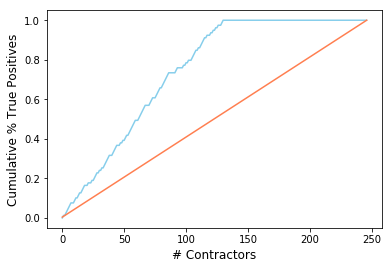

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df_test_result["%_Cumulative_True_Positive"].values.tolist(),color="skyblue")
plt.plot(df_test_result["%_Cumulative_Count"].values.tolist(),color="coral")
plt.xlabel('# Contractors',fontsize=12)
plt.ylabel('Cumulative % True Positives',fontsize=12)

# (8)  AUC-ROC Curve

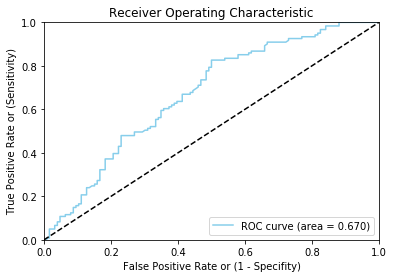

In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(df_test_result["Actual"].values.tolist(), df_test_result["Predict_Positive_Prob"].values.tolist())
roc_auc = auc(fpr,tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc, color="skyblue")
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")